<a href="https://colab.research.google.com/github/kozz84/particle_analysis/blob/main/Size_distribution_150Hz_SpectralClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [588]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [589]:
df = pd.read_csv('/content/drive/MyDrive/CIOP/size distrubution_150Hz.csv',sep=';')
df.dropna(inplace=True)
df.head(2)

,,Label,Area,Perim.,Major,Minor,Angle,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Group,AR2,Equivalent Diameter,Circ sqrt
0,1,210902_#7_150_10_1um_i003.tif:1105-0077,3962.356,628.458,73.079,69.035,108.770,0.126,107.092,56.0,1102.0,166.608,87.635,1.059,0.945,0.581,0,0.818315,71.028363,0.355063
1,2,210902_#7_150_10_1um_i003.tif:1214-0196,1944.262,414.578,78.702,31.454,12.769,0.142,115.068,173.0,1222.0,7.431,53.576,2.502,0.400,0.461,0,0.465603,49.754510,0.377030


In [590]:
df_kcluster = df[['Perim.', 'Equivalent Diameter','Circ sqrt','Solidity', 'AR2' ,'Area']].copy()
df_kcluster.head(2)

,Perim.,Equivalent Diameter,Circ sqrt,Solidity,AR2,Area
0,628.458,71.028363,0.355063,0.581,0.818315,3962.356
1,414.578,49.754510,0.377030,0.461,0.465603,1944.262


In [591]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_kcluster)
df_kcluster_scaled = scaler.transform(df_kcluster)
df_kcluster_scaled = pd.DataFrame(df_kcluster_scaled, columns = df_kcluster.columns)
df_kcluster_scaled.head(2)

,Perim.,Equivalent Diameter,Circ sqrt,Solidity,AR2,Area
0,0.129369,0.279385,0.262852,0.442408,0.849322,0.088370
1,0.083441,0.187620,0.287069,0.285340,0.348156,0.043009


In [592]:
df_kcluster_scaled = pd.DataFrame(df_kcluster_scaled, columns = df_kcluster.columns)
df_kcluster_scaled.head(2)

,Perim.,Equivalent Diameter,Circ sqrt,Solidity,AR2,Area
0,0.129369,0.279385,0.262852,0.442408,0.849322,0.088370
1,0.083441,0.187620,0.287069,0.285340,0.348156,0.043009


In [593]:
from sklearn.cluster import SpectralClustering

In [594]:
model = SpectralClustering(n_clusters=2,
                            affinity='nearest_neighbors',
                            assign_labels='kmeans',
                            random_state=466)
model.fit(df_kcluster_scaled)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2, random_state=466)

In [595]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
model.labels_[model.labels_ == 2] = 1
print(confusion_matrix(df['Group'],model.labels_))
print(round(accuracy_score(df['Group'],model.labels_),2))

[[1128   27]
 [   1  400]]
0.98


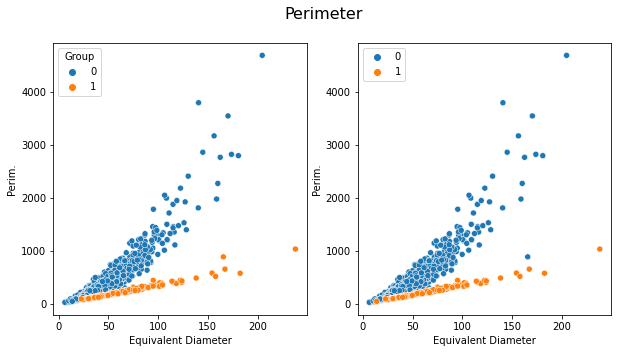

In [596]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Perimeter', fontsize=16)
sns.scatterplot(data=df, y='Perim.',x='Equivalent Diameter', hue='Group',ax=ax1)
sns.scatterplot(data=df_kcluster, y='Perim.',x='Equivalent Diameter', hue=model.labels_,ax=ax2)

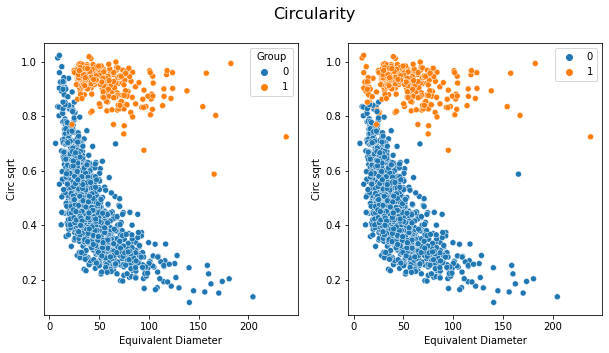

In [597]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Circularity', fontsize=16)
sns.scatterplot(data=df, y='Circ sqrt',x='Equivalent Diameter', hue='Group',ax=ax1)
sns.scatterplot(data=df_kcluster, y='Circ sqrt',x='Equivalent Diameter', hue=model.labels_,ax=ax2)

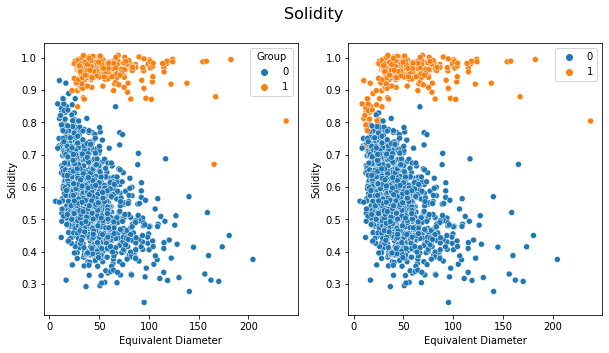

In [598]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Solidity', fontsize=16)
sns.scatterplot(data=df, y='Solidity',x='Equivalent Diameter', hue='Group',ax=ax1)
sns.scatterplot(data=df_kcluster, y='Solidity',x='Equivalent Diameter', hue=model.labels_,ax=ax2)